# KNN概述

k-近邻（kNN, k-NearestNeighbor）算法是一种基本分类与回归方法，我们这里只讨论分类问题中的k-近邻算法。

## KNN工作原理

> 工作原理

1 假设有一个带有标签的样本数据集（训练样本集），其中包含每条数据与所属分类的对应关系。  
2 输入没有标签的新数据后，将新数据的每个特征与样本集中数据对应的特征进行比较。  

* 计算新数据与样本数据集中每条数据的距离。
* 对求得的所有距离进行排序（从小到大，越小表示越相似）。
* 取前 k （k 一般小于等于 20 ）个样本数据对应的分类标签。  

3 求 k 个数据中出现次数最多的分类标签作为新数据的分类。 

> 通俗理解

给定一个训练数据集，对新的预测实例，在训练数据集中找到与该实例最邻近的 k 个实例，这 k 个实例的多数属于某个类，就把该预测实例分为这个类。  

> 算法流程

收集数据：任何方法  
准备数据：距离计算所需要的数值，最好是结构化的数据格式  
分析数据：任何方法  
训练算法：此步骤不适用于 k-近邻算法  
测试算法：计算错误率  
使用算法：输入样本数据和结构化的输出结果，然后运行 k-近邻算法判断输入数据分类属于哪个分类，最后对计算出的分类执行后续处理  

> 算法特点

优点：精度高、对异常值不敏感、无数据输入假定  
缺点：计算复杂度高、空间复杂度高  
适用数据范围：数值型和标称型  

## KNN实例

项目背景参考此处：https://github.com/apachecn/AiLearning/blob/master/docs/ml/2.k-%E8%BF%91%E9%82%BB%E7%AE%97%E6%B3%95.md

In [1]:
# 首先导入依赖包
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 准备数据

使用pandas直接从文件中读取数据

In [16]:
def file2matrix(filename):
    df = pd.read_table(filename,header=None,delim_whitespace=True)
    return df

df = file2matrix('data/datingTestSet2.txt')

### 分析数据

我们使用 matplotlib 来把数据进行可视化，通过2维散点图来显示不同样本的分布区域。

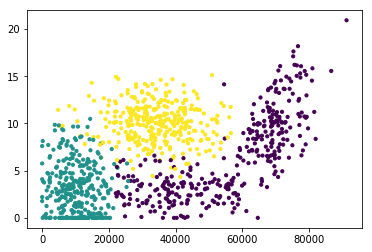

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
# x、y必须是长度相等的序列，
# s为点的面积或大小,默认为20
# c为不同样本的颜色值,默认为'b'
# marker：点的形状,默认为'o'
ax.scatter(x=df.iloc[:,0], y=df.iloc[:,1],s=10, c=df.iloc[:,3])
plt.show()

### 数据归一化

基于离散图来看，x轴的坐标数值和y轴的数值不在一个数量级且相差较大。

### 使用sklearn实现knn算法


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [36]:
# 划分训练集和测试集数据
# 获取前三列作为特征
x = df.iloc[:,0:3]
# 获取最后一列作为标签
y = df.iloc[:,3:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
score = knn.score(x_test,y_test)
# print '真实分类标签:'+str(y_test)
print '模型分类结果:'+str(prediction)+'\n算法准确度:'+str(score)

模型分类结果:[3 1 2 1 1 1 3 1 3 2 2 3 1 2 1 1 1 2 2 2 2 1 3 1 3 3 3 2 1 1 3 3 2 1 2 3 1
 1 1 1 1 1 3 1 2 1 2 2 1 3 1 1 1 2 1 3 1 3 3 1 1 3 3 1 3 3 1 1 1 3 2 2 3 2
 3 2 3 1 2 1 2 1 3 2 2 1 2 3 1 3 1 3 1 1 2 1 2 1 3 2 3 1 2 3 2 2 1 3 3 1 3
 1 1 3 1 3 1 2 1 2 1 2 2 3 2 2 2 1 1 1 1 1 3 2 2 2 1 1 3 2 3 2 1 1 3 1 2 3
 2 1 2 2 2 2 3 3 2 3 2 3 1 2 2 2 1 3 1 3 2 1 2 2 3 1 2 1 3 2 2 2 3 3 1 2 1
 2 3 2 1 3 2 3 3 1 3 1 1 3 2 1 3 1 1 2 2 2 2 1 3 1 3 3 1 1 2 3 3 1 1 3 3 1
 1 3 2 2 3 1 3 3 1 2 2 2 2 2 3 1 2 3 1 2 2 1 3 2 1 3 3 2 2 2 3 1 1 2 3 2 2
 2 1 3 2 1 2 1 2 3 3 3 1 2 1 2 3 3 3 2 1 2 3 1 1 2 3 2 3 2 3 2 1 1 3 1 2 3
 3 3 1 1]
算法准确度:0.78


/Library/Python/2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
